In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/home/ppomorsk/local/bin/tesseract'
tessdata_dir_config = '--tessdata-dir "/project/2017/pawel"'

In [2]:
import pytesseract
from PIL import Image
im=Image.open('/project/2017/pawel/sample_text.png')
resultOCR=pytesseract.image_to_string(im,config=tessdata_dir_config)
print(resultOCR)

The Life and Work of
Fredson Bowers

by
G. THOMAS TANSELLE

 

n Every eeu or enpeavon rege ane a rew rioures wiose accont-
plishment and influence cause them to be the symbols of their age;
their careers and oeuvres become the touchstones by which the
field is measured and its history told. In the related pursuits of

analytical and descriptive bibliography, textual criticism, and scholarly
editing, Fredson Bowers was such a figure, dominating the four decades
after 1949, when his Principles of Bibliographical Description was pub-
lished. By 1973 the period was already being called "the age of Bowers:
in that year Norman Sanders, writing the chapter on textual scholarship
for Stanley Wells's Shakespeare: Select Bibliographies, gave this title to
a section of his essay. For most people, it would be achievement enough
to rise to such a position in a field as complex as Shakespearean textual
studies; but Bowers played an equally important role in other areas.
Editors of nineteenth-centur

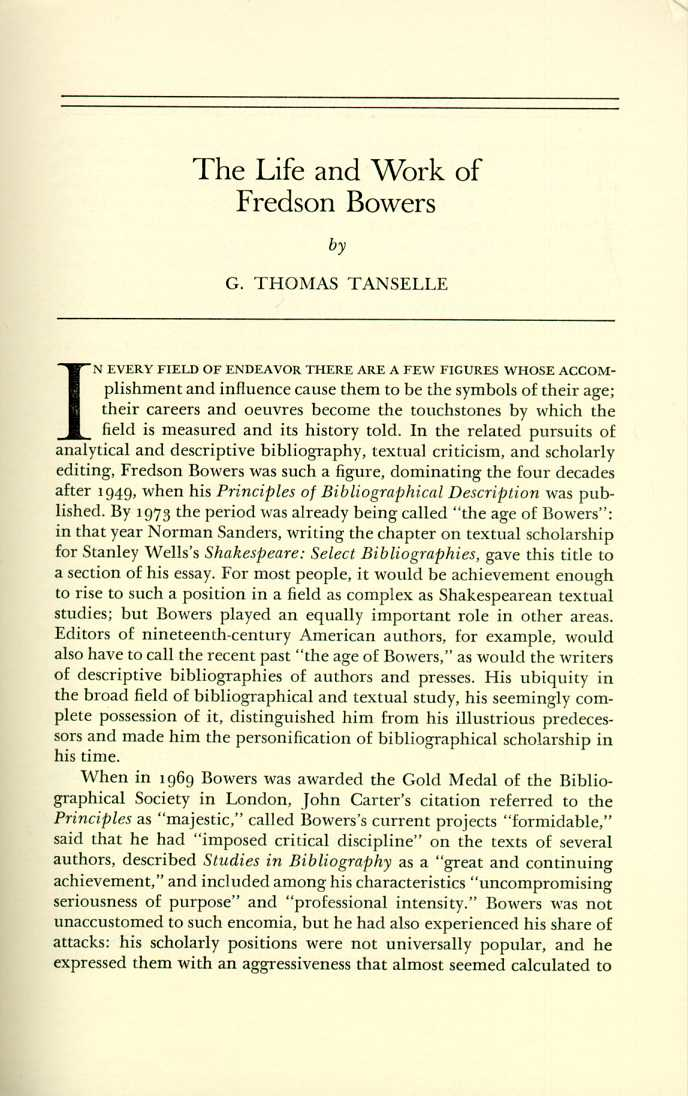

In [3]:
from IPython.display import Image as Img

Img(filename="/project/2017/pawel/sample_text.png")

In [4]:
import pyspark
sc = pyspark.SparkContext()

In [5]:
import pytesseract
from PIL import Image
import io

def process_whole_file_with_spark(something):
    
    filename=something[0]
    image_data=io.BytesIO(something[1])
    im=Image.open(image_data)
    textOCR = pytesseract.image_to_string(im,config=tessdata_dir_config)
    return filename,textOCR

In [6]:
imgfiles=sc.binaryFiles('/project/2017/pawel/sample_text.png')
globalcount = imgfiles.map(process_whole_file_with_spark)
result=globalcount.collect()
print(result)

[('file:/project/2017/pawel/sample_text.png', 'The Life and Work of\nFredson Bowers\n\nby\nG. THOMAS TANSELLE\n\n \n\nn Every eeu or enpeavon rege ane a rew rioures wiose accont-\nplishment and influence cause them to be the symbols of their age;\ntheir careers and oeuvres become the touchstones by which the\nfield is measured and its history told. In the related pursuits of\n\nanalytical and descriptive bibliography, textual criticism, and scholarly\nediting, Fredson Bowers was such a figure, dominating the four decades\nafter 1949, when his Principles of Bibliographical Description was pub-\nlished. By 1973 the period was already being called "the age of Bowers:\nin that year Norman Sanders, writing the chapter on textual scholarship\nfor Stanley Wells\'s Shakespeare: Select Bibliographies, gave this title to\na section of his essay. For most people, it would be achievement enough\nto rise to such a position in a field as complex as Shakespearean textual\nstudies; but Bowers played a

In [7]:
!echo $PATH
# the tesseract executable you want to use must be in one of these directories
# I copied it to /home/ppomorsk/.local/share/jupyter/kernels/python3.5/venv/bin

/home/ppomorsk/.local/share/jupyter/kernels/python3.5/venv/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/spark/2.1.1/sbin:/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/spark/2.1.1/bin:/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/java/1.8.0_121:/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/java/1.8.0_121/bin:/sbin:/bin:/usr/sbin:/usr/bin


In [8]:
import time
t0 = time.time()
imgfiles=sc.binaryFiles('/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29-006.tif')
print("getNumPartitions",imgfiles.getNumPartitions())
print(imgfiles.count())

globalcount = imgfiles.map(process_whole_file_with_spark)
result=globalcount.collect()
t1 = time.time()
print("total time was ",t1-t0)


getNumPartitions 1
1
total time was  209.09970021247864


In [10]:
print(result)
#imgfiles=sc.binaryFiles('/project/datasets/PageScans/1916/19160929/*.tif')



[('file:/project/datasets/PageScans/1916/19160929/0FFO-1916-SEP29-006.tif', '- ApyaNce n\n= THE CENTRE |\n\n \n\n(LIGHT BRIMISH |\n\n°\na v B\n\n-THE CHANCELLORS ~\n-_ SPEECK | 0\n\n. LUTSEK SALIENT |\n\nATTACKED. _\n\nWar Sra Year: b¥th Day,\n\nt\na\n\nSteady progress is being mado on the British\n\nFront. Yesterdsy the Schwaben Redoubt was\nattacked. Most of it is in British hands." It\noccupies the crest of the Thiepval plateau, with\na full view over the northorn valloy of the\n"Ancre. . R .\n\nElsewhers also our lines havo been advanced -\nnorth and north-east of Courcelette and be-\ntween Martinpuich and Guoudecoutt. T116m\nwe have established posts wost and south-west\nof Eaucourt Abbaye, and are within $00 yards\n\ns the village. *\n\nThe British dispatch last night again commended\nhighly the work of the airmen, and quoted a\ncaptured report from the commander of the\nGerman corps who took part in the battle.\nHe describes the valour of the British infantry,\nand complains tha

[]
